## Clustering asthma-related papers in CORD-19 dataset

### Introduction
In this project, we explore the relationship between asthma and coronaviruses. What are the most popular topics the research community is focuses on, before and after the COVID-19 outbreak? Are the areas of interest around asthma and coronaviruses the same before and after the appearance of SARS-CoV-2? The relationship between respiratory disorders and SARS-CoV-2 infection and has been broadly studied in a molecular, clinical and epidiomiological level, but remains still a controversial subject. More details about this relationship can be found here:

In this project we cluster scientific publications in the topic of asthma and coronaviruses.Clustering is performed using NLP techniques and is based in the most frequent words apppering in the papers. Two groups of clusters are created, one for papers published before and one for papers published after the COVID-19 outbreak. For the two periods of times, clustering aims at identifying popular research topics and finding potential gaps in research between asthma and the new coronavirus.

### Data
In response to the COVID-19 pandemic a large database, the COVID-19 Open Research Dataset (CORD-19), was created and has been made publicly available. CORD-19 is a resource of hundreds of thousands scholarly articles, about COVID-19, SARS-CoV-2, and related coronaviruses.
More information about this open source can be found here:
https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

### Data processing

For this project, we select only those papers where the word "asthma" appears at least once in their abstract. This data is found in "asthma_data" csv file. In this analysis, we only consider papers written in English language. We take December 2019 as the point where papers about SARS-CoV-2 started to be published. According to this date, we divide our data as "Before COVID-19" and "After COVID-19" entries.The following analysis is then the same for these 2 groups of papers:

Using Python's NLTK we perfom tokenization and then stemming of the papers' abstract text. With Scikit-learn’s Tfidf Vectorizer, tokens are transformed into to a matrix of TF-IDF features. These TF-IDF features are then catogorized into clusters with the use of Kmeans algorithm. Finally, the PCA algorithm is used for dimensionality reduction and vizualisation of clustering in a 2-dimensional space.

### Loading libraries

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
import nltk
import string
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from langdetect import detect

In [108]:
import plotly.express as px
import seaborn as sns

In [109]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")


In [110]:
spacy_stop_words = ['whence', 'here', 'show', 'were', 'why', 'n’t', 'the', 'whereupon', 'not', 'more', 'how', 'eight', 'indeed', 'i', 'only', 'via', 'nine', 're', 'themselves', 'almost', 'to', 'already', 'front', 'least', 'becomes', 'thereby', 'doing', 'her', 'together', 'be', 'often', 'then', 'quite', 'less', 'many', 'they', 'ourselves', 'take', 'its', 'yours', 'each', 'would', 'may', 'namely', 'do', 'whose', 'whether', 'side', 'both', 'what', 'between', 'toward', 'our', 'whereby', "'m", 'formerly', 'myself', 'had', 'really', 'call', 'keep', "'re", 'hereupon', 'can', 'their', 'eleven', '’m', 'even', 'around', 'twenty', 'mostly', 'did', 'at', 'an', 'seems', 'serious', 'against', "n't", 'except', 'has', 'five', 'he', 'last', '‘ve', 'because', 'we', 'himself', 'yet', 'something', 'somehow', '‘m', 'towards', 'his', 'six', 'anywhere', 'us', '‘d', 'thru', 'thus', 'which', 'everything', 'become', 'herein', 'one', 'in', 'although', 'sometime', 'give', 'cannot', 'besides', 'across', 'noone', 'ever', 'that', 'over', 'among', 'during', 'however', 'when', 'sometimes', 'still', 'seemed', 'get', "'ve", 'him', 'with', 'part', 'beyond', 'everyone', 'same', 'this', 'latterly', 'no', 'regarding', 'elsewhere', 'others', 'moreover', 'else', 'back', 'alone', 'somewhere', 'are', 'will', 'beforehand', 'ten', 'very', 'most', 'three', 'former', '’re', 'otherwise', 'several', 'also', 'whatever', 'am', 'becoming', 'beside', '’s', 'nothing', 'some', 'since', 'thence', 'anyway', 'out', 'up', 'well', 'it', 'various', 'four', 'top', '‘s', 'than', 'under', 'might', 'could', 'by', 'too', 'and', 'whom', '‘ll', 'say', 'therefore', "'s", 'other', 'throughout', 'became', 'your', 'put', 'per', "'ll", 'fifteen', 'must', 'before', 'whenever', 'anyone', 'without', 'does', 'was', 'where', 'thereafter', "'d", 'another', 'yourselves', 'n‘t', 'see', 'go', 'wherever', 'just', 'seeming', 'hence', 'full', 'whereafter', 'bottom', 'whole', 'own', 'empty', 'due', 'behind', 'while', 'onto', 'wherein', 'off', 'again', 'a', 'two', 'above', 'therein', 'sixty', 'those', 'whereas', 'using', 'latter', 'used', 'my', 'herself', 'hers', 'or', 'neither', 'forty', 'thereupon', 'now', 'after', 'yourself', 'whither', 'rather', 'once', 'from', 'until', 'anything', 'few', 'into', 'such', 'being', 'make', 'mine', 'please', 'along', 'hundred', 'should', 'below', 'third', 'unless', 'upon', 'perhaps', 'ours', 'but', 'never', 'whoever', 'fifty', 'any', 'all', 'nobody', 'there', 'have', 'anyhow', 'of', 'seem', 'down', 'is', 'every', '’ll', 'much', 'none', 'further', 'me', 'who', 'nevertheless', 'about', 'everywhere', 'name', 'enough', '’d', 'next', 'meanwhile', 'though', 'through', 'on', 'first', 'been', 'hereby', 'if', 'move', 'so', 'either', 'amongst', 'for', 'twelve', 'nor', 'she', 'always', 'these', 'as', '’ve', 'amount', '‘re', 'someone', 'afterwards', 'you', 'nowhere', 'itself', 'done', 'hereafter', 'within', 'made', 'ca', 'them']

In [111]:
# extending the list of stopwords taken into account
stop_words.extend(spacy_stop_words)


### Data overview

In [112]:
#We load the csv file to pands dataframe and have a look at the papers' metadata we'll use
asthma_df = pd.read_csv("asthma_data.csv")
asthma_df.head()

,gitcord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,abstract_lower,title_lower
0,qva0jt86,4ba79e54ecf81b30b56461a6aec2094eaf7b7f06,PMC,Relevance of human metapneumovirus in exacerba...,10.1186/1465-9921-6-150,PMC1334186,16371156.0,cc-by,BACKGROUND AND METHODS: Human metapneumovirus ...,2005-12-21,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/4ba79e54ecf81b30b5646...,document_parses/pmc_json/PMC1334186.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN,background and methods: human metapneumovirus ...,relevance of human metapneumovirus in exacerba...
1,chz8luni,d68d71553d3a31381c0c3851351f912a9a7be1c9,PMC,Surfactant therapy for acute respiratory failu...,10.1186/cc5944,PMC2206432,17573963.0,cc-by,INTRODUCTION: Exogenous surfactant is used to ...,2007-06-15,...,Crit Care,NaN,NaN,NaN,document_parses/pdf_json/d68d71553d3a31381c0c3...,document_parses/pmc_json/PMC2206432.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,NaN,introduction: exogenous surfactant is used to ...,surfactant therapy for acute respiratory failu...
2,3zh8jmc2,fe2000f280297c40bc53ce95d703a9ca6aac19fd,PMC,Differential Regulation of Type I Interferon a...,10.1371/journal.ppat.1000587,PMC2736567,19806178.0,cc-by,A number of paramyxoviruses are responsible fo...,2009-09-18,...,PLoS Pathog,NaN,NaN,NaN,document_parses/pdf_json/fe2000f280297c40bc53c...,document_parses/pmc_json/PMC2736567.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,NaN,a number of paramyxoviruses are responsible fo...,differential regulation of type i interferon a...
3,7p3b6tyf,3ccbd07ee1865e4f2afffdb6cc8b6039ab605ee7,PMC,The Tennessee Children's Respiratory Initiativ...,10.1111/j.1440-1843.2010.01743.x,PMC2992986,20409023.0,no-cc,Background and objective: The ‘attack rate’ of...,2010-04-08,...,Respirology,NaN,NaN,NaN,document_parses/pdf_json/3ccbd07ee1865e4f2afff...,document_parses/pmc_json/PMC2992986.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,NaN,background and objective: the ‘attack rate’ of...,the tennessee children's respiratory initiativ...
4,xrsyj1tc,fa88fbb8716e5fca7d513bcb5a0a608456a59205,PMC,Analysing the eosinophil cationic protein - a ...,10.1186/1465-9921-12-10,PMC3030543,21235798.0,cc-by,Eosinophil granulocytes reside in respiratory ...,2011-01-14,...,Respir Res,NaN,NaN,NaN,document_parses/pdf_json/fa88fbb8716e5fca7d513...,document_parses/pmc_json/PMC3030543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,eosinophil granulocytes reside in respiratory ...,analysing the eosinophil cationic protein - a ...


There are 2567 papers containing the word "asthma", among the coronavirus-related publications 

In [113]:
asthma_df.shape

(2567, 21)

In [114]:
# We use the langdetect google library to dect the language of the "abstract" column in our dataframe

asthma_df["lang_detect"] = asthma_df["abstract"].apply(detect)

In [115]:
# As non-english papers are a small percent of our total papers, weexclude them from our analysis

asthma_df["lang_detect"].value_counts()

en    2529
de      12
fr      11
es       8
ru       3
pt       2
nl       2
Name: lang_detect, dtype: int64

We now have 2528 papers in total, written in english.

In [116]:
asthma_df = asthma_df.loc[asthma_df['lang_detect'] == "en"]
asthma_df.shape

(2529, 22)

In [117]:
asthma_df['source_x'].value_counts()

WHO                              691
Medline; PMC                     564
Medline                          549
Elsevier; Medline; PMC           327
PMC                              248
MedRxiv; WHO                      62
Elsevier; PMC                     44
ArXiv                              7
BioRxiv; WHO                       7
BioRxiv                            7
MedRxiv                            6
Medline; PMC; WHO                  5
MedRxiv; Medline; WHO              4
MedRxiv; Medline; PMC; WHO         3
Elsevier; Medline; PMC; WHO        2
ArXiv; Elsevier; Medline; PMC      1
PMC; WHO                           1
BioRxiv; MedRxiv                   1
Name: source_x, dtype: int64

We divide the papers between those published before the new coronavirus SARS-CoV-2 has appeared and those published after the COVID-19 outbreak. We pick December 2019 as the cut-off date.

In [118]:
asthma_before_covid = asthma_df.loc[asthma_df['publish_time']<"2019-12-01"].reset_index(drop=True)
asthma_after_covid = asthma_df.loc[asthma_df['publish_time']>="2019-12-01"].reset_index(drop=True)

We can also have a look at the number of the papers published by month, since the covid outbreak. 

In [119]:
asthma_after_covid['publish_time_new'] =  pd.to_datetime(asthma_after_covid['publish_time'])

In [120]:
asthma_after_covid['publish_month_year'] = pd.to_datetime(asthma_after_covid['publish_time']).dt.to_period('M')
asthma_after_covid.head()

,gitcord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,abstract_lower,title_lower,lang_detect,publish_time_new,publish_month_year
0,3ki0dzwb,71b8c50ee0e1f4e79e6618301b768befbf943a5d,PMC,Inflammatory and microbiological associations ...,10.1183/23120541.00267-2019,PMC6983494,32010717.0,cc-by-nc,Patients with near-fatal asthma requiring ECMO...,2020-01-27,...,NaN,document_parses/pdf_json/71b8c50ee0e1f4e79e661...,document_parses/pmc_json/PMC6983494.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,NaN,patients with near-fatal asthma requiring ecmo...,inflammatory and microbiological associations ...,en,2020-01-27,2020-01
1,okc7wf4n,f4edbfd3e9a8b2d0d76378e6588a5971b070a4c9,PMC,Different effects of acetyl-CoA carboxylase in...,10.1007/s43440-019-00027-8,PMC7223088,32048254.0,no-cc,BACKGROUND AND OBJECTIVE: Acetyl CoA carboxyla...,2020-01-08,...,NaN,document_parses/pdf_json/f4edbfd3e9a8b2d0d7637...,document_parses/pmc_json/PMC7223088.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,background and objective: acetyl coa carboxyla...,different effects of acetyl-coa carboxylase in...,en,2020-01-08,2020-01
2,8lqjl0ee,1f6fa8e138abc1556e853c53dcce8f5e16007fcc,PMC,Risk of Readmission and Mortality Following Ho...,10.1007/s00408-019-00300-w,PMC7223622,31828514.0,no-cc,PURPOSE: Hypercapnic respiratory failure (HRF)...,2019-12-11,...,NaN,document_parses/pdf_json/1f6fa8e138abc1556e853...,document_parses/pmc_json/PMC7223622.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,purpose: hypercapnic respiratory failure (hrf)...,risk of readmission and mortality following ho...,en,2019-12-11,2019-12
3,vosu7y6j,6fa9233f054f4bbb31972e05c1478b0ec83ccc16,PMC,Innate Type 2 Responses to Respiratory Syncyti...,10.3390/v12050521,PMC7290766,32397226.0,cc-by,Respiratory syncytial virus (RSV) is a common ...,2020-05-08,...,NaN,document_parses/pdf_json/6fa9233f054f4bbb31972...,document_parses/pmc_json/PMC7290766.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,respiratory syncytial virus (rsv) is a common ...,innate type 2 responses to respiratory syncyti...,en,2020-05-08,2020-05
4,yyw64g9w,8d634bba632c08e7d8e105a66dac4e0d813ab4e9,PMC,From Mouse to Man and Back: Closing the Correl...,10.3390/diagnostics10090636,PMC7554749,32859103.0,cc-by,"Lung diseases such as fibrosis, asthma, cystic...",2020-08-26,...,NaN,document_parses/pdf_json/8d634bba632c08e7d8e10...,document_parses/pmc_json/PMC7554749.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,"lung diseases such as fibrosis, asthma, cystic...",from mouse to man and back: closing the correl...,en,2020-08-26,2020-08


In [121]:
asthma_after_covid = asthma_after_covid.sort_values('publish_month_year')

In [122]:
dates = asthma_after_covid["publish_month_year"].value_counts()

In [123]:
dates_df = dates.to_frame().reset_index()

In [124]:
dates_df = dates_df.sort_values("index")
dates_df

,index,publish_month_year
12,2019-12,10
0,2020-01,602
13,2020-02,9
14,2020-03,8
11,2020-04,19
8,2020-05,69
7,2020-06,74
3,2020-07,92
9,2020-08,60
4,2020-09,90


The graph below illustrates the number of papers published through the last 12-14 months. However, we recognize that the two picks noticed in January 2020 and January 2021 are not completely accurate. As an amount of papers had only the year (yyyy) mentioned in their publication date, their publivcation date is taken as 01/01/yyyy.

As a result, we cannot draw a very accurate example of the distribution of publications through the months.

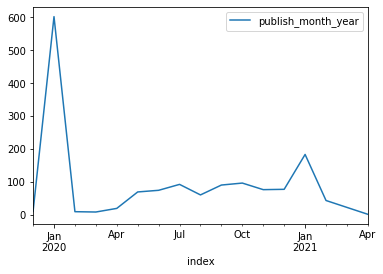

In [125]:
dates_df.plot(x ='index', y = 'publish_month_year')

## Clustering

In [126]:
texts_before = asthma_before_covid["abstract_lower"].tolist()

In [127]:
def custom_tokenizer(str_input):
    
    stemmer = PorterStemmer()
    words = nltk.word_tokenize(str_input)
    words = [word for word in words if word.lower() not in stop_words]

    words = [word.replace('â¡', '') for word in words]
    words = [word.replace('â¢', '') for word in words]
    words = [word.replace('â£', '') for word in words]
    
    words = [''.join(c for c in word if c not in string.punctuation+'©±×≤≥●＜--“”→„') for word in words]
    words = [word for word in words if word not in ['‘', '’', '„']]
        
    words = [word for word in words if word]
    words = [word for word in words if not any(char.isdigit() for char in word)]
    
    words = [stemmer.stem(word) for word in words]
    return words

In [128]:
vec_before = TfidfVectorizer(min_df=5,tokenizer=custom_tokenizer,
                             max_features=2000,
                      stop_words='english')
matrix_before = vec_before.fit_transform(texts_before)
df_before = pd.DataFrame(matrix_before.toarray(), columns=vec_before.get_feature_names())
df_before.head()

c:\users\katerina\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cri', 'describ', 'sincer'] not in stop_words.



,aberr,abil,abl,abnorm,absenc,absent,absolut,absorpt,abstract,abund,...,x,xray,year,yield,young,younger,yr,α,β,–
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.040170,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.035583,0.0,0.0,0.0,0.0,0.0,0.0,0.0


For more information about the use of Kmeans in clustering: https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

In [129]:
number_of_clusters=10
km_before = KMeans(n_clusters=number_of_clusters)
km_before.fit(matrix_before)

KMeans(n_clusters=10)

Let's have an over view of our cluster's centers (centroids) and labels. After that, we get the top terms for every cluster. In other words, we see which are the most frequently mentioned words per cluster. Note: since we have used Stemming, we only have the root of the words now.

In [130]:
centroids_before, labels_before = km_before.cluster_centers_, km_before.labels_
print(centroids_before)
print(labels_before)

[[0.         0.00096382 0.00077045 ... 0.         0.00251647 0.00489185]
 [0.         0.00508948 0.         ... 0.         0.         0.        ]
 [0.         0.0009468  0.00105044 ... 0.         0.         0.00741541]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0025379  0.         ... 0.         0.         0.        ]
 [0.00140137 0.002731   0.00418409 ... 0.00129082 0.00185638 0.00115546]]
[7 4 5 ... 4 4 8]


In [131]:
print("Top terms per cluster:")
order_centroids_before = km_before.cluster_centers_.argsort()[:, ::-1]
terms = vec_before.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids_before[i, :20]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: p asthma patient exacerb day group level subject acut infant symptom viral infect cold score serum correl control sever sputum
Cluster 1: hrv hrvc children infect respiratori human detect asthma hrva associ ill strain speci exacerb virus caus p rhinovirus identifi patient
Cluster 2: detect respiratori infect children virus viru viral patient exacerb rhinoviru asthma sampl hbov pneumonia influenza pathogen adenoviru tract clinic ill
Cluster 3: rsv bronchiol infant children respiratori infect wheez develop caus viru hospit asthma viral syncyti rhinoviru age year vaccin sever common
Cluster 4: asthma patient diseas health use treatment studi effect respiratori clinic cough chronic children review pulmonari manag includ condit acut risk
Cluster 5: airway diseas lung inflammatori pulmonari activ cell protein function asthma role chronic express inflamm gene respons regul mechan remodel signal
Cluster 6: exacerb asthma infect viral respiratori virus review d

In [132]:
order_centroids_before
#word with index 1049 has highest Tfidf value in the first array

array([[1292,  145, 1319, ..., 1021, 1020,    0],
       [ 837,  840,  284, ..., 1147, 1148,    0],
       [ 490, 1578,  919, ...,  747,  746,    0],
       ...,
       [ 284,  831, 1319, ...,  946,  945,    0],
       [1972,  284, 1599, ..., 1121, 1123,    0],
       [ 262,  919, 1580, ..., 1550,  491, 1057]], dtype=int64)

For more information about PCA and its implementation in Python:
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [133]:
T = preprocessing.Normalizer().fit_transform(df_before)
# Dimesionality reduction to 2
pca_model = PCA(n_components=2, random_state = 2)
pca_model.fit(T) 
T = pca_model.transform(T) 

# transform the 'centroids of KMeans'

centroid_pca = pca_model.transform(centroids_before)


In [134]:
asthma_before_covid['labels'] = km_before.labels_
asthma_before_covid['pca_1'] = T[:, 0]
asthma_before_covid['pca_2'] = T[:, 1]

In [135]:
asthma_before_covid['labels'] = asthma_before_covid['labels'].astype(str)

In [136]:
fig = px.scatter(asthma_before_covid, 
                 x="pca_1", 
                 y="pca_2", 
                 color="labels",
                 hover_data=['title'])

In [137]:
fig.show()

#### After covid-19

In [138]:
texts_after = asthma_after_covid["abstract_lower"].tolist()

In [139]:
vec_after = TfidfVectorizer(tokenizer=custom_tokenizer,
                      stop_words='english', 
                           max_features=1000)
matrix_after = vec_after.fit_transform(texts_after)
df_after = pd.DataFrame(matrix_after.toarray(), columns=vec_after.get_feature_names())


c:\users\katerina\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cri', 'describ', 'sincer'] not in stop_words.



In [140]:
df_after.head()

,abil,abl,abnorm,absenc,abstract,access,accord,account,accumul,achiev,...,world,worldwid,wors,worsen,wuhan,year,york,young,younger,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.076216,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [141]:
number_of_clusters=10
km_after = KMeans(n_clusters=number_of_clusters)
km_after.fit(matrix_after)
km_after.fit

<bound method KMeans.fit of KMeans(n_clusters=10)>

In [142]:
centroids_after, labels_after = km_after.cluster_centers_, km_after.labels_
print(centroids_after)
print(labels_after)

[[0.         0.00501786 0.         ... 0.         0.         0.        ]
 [0.00136042 0.         0.00805406 ... 0.0098062  0.02010528 0.01370836]
 [0.00276964 0.00089209 0.00192717 ... 0.00329093 0.         0.        ]
 ...
 [0.00356241 0.00257358 0.00631808 ... 0.00611313 0.0026634  0.00212767]
 [0.001772   0.00172212 0.00122814 ... 0.00133443 0.00651702 0.        ]
 [0.00650875 0.002546   0.00205394 ... 0.         0.         0.        ]]
[5 9 3 ... 7 9 5]


In [143]:
print("Top terms per cluster:")
order_centroids_after = km_after.cluster_centers_.argsort()[:, ::-1]
terms = vec_after.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids_after[i, :20]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: air pollut health lockdown exposur human pm impact particul qualiti environment matter effect respiratori citi reduc econom asthma level associ
Cluster 1: children asthma pediatr hospit infect respiratori patient year sever clinic age studi symptom bronchiol risk diseas admiss present wheez adult
Cluster 2: asthma patient sever exacerb corticosteroid infect biolog risk treatment inhal therapi diseas pandem control continu use asthmat recommend manag respiratori
Cluster 3: patient hospit diseas mortal comorbid risk ci age p admiss sever outcom studi associ icu asthma factor clinic diabet death
Cluster 4: women pregnant matern pregnanc aor sever case neonat diseas birth p death ci infect hospit preterm deliveri obes patient vs
Cluster 5: drug medicin treatment effect trial studi tradit acid antiinflammatori chines clinic lung diseas pharmacolog activ therapeut potenti improv repurpos compound
Cluster 6: allergi care telemedicin patient allerg provid pand

In [144]:
order_centroids_after

array([[ 36, 668, 393, ..., 543, 540,   0],
       [144,  77, 643, ..., 130, 127, 499],
       [ 77, 639, 833, ..., 213, 210, 999],
       ...,
       [266, 782, 639, ..., 535, 245, 761],
       [639, 148, 918, ..., 130, 617, 999],
       [129, 338, 375, ..., 350, 355, 999]], dtype=int64)

In [145]:
T_after = preprocessing.Normalizer().fit_transform(df_after)
# Dimesionality reduction to 2
pca_model = PCA(n_components=2, random_state=0)
pca_model.fit(T_after) 
T_after = pca_model.transform(T_after) 

centroid_pca_after = pca_model.transform(centroids_after)

In [146]:
asthma_after_covid['labels'] = km_after.labels_
asthma_after_covid['pca_1'] = T_after[:, 0]
asthma_after_covid['pca_2'] = T_after[:, 1]

In [147]:
asthma_after_covid['labels'] = asthma_after_covid['labels'].astype(str)

In [148]:
fig = px.scatter(asthma_after_covid, 
                 x="pca_1", 
                 y="pca_2", 
                 color="labels",
                 hover_data=['title'])

In [149]:
fig.show("png")

ValueError: 
The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    C:\Users\Katerina\PycharmProjects\Asthma_clustering\newenv\Scripts
    C:\Program Files (x86)\Common Files\Oracle\Java\javapath
    C:\Program Files\Broadcom\Broadcom 802.11 Network Adapter
    C:\Program Files\Common Files\Microsoft Shared\Windows Live
    C:\Program Files (x86)\Common Files\Microsoft Shared\Windows Live
    C:\Program Files\Broadcom\Broadcom 802.11
    C:\WINDOWS\system32
    C:\WINDOWS
    C:\WINDOWS\System32\Wbem
    C:\WINDOWS\System32\WindowsPowerShell\v1.0\
    C:\Program Files (x86)\ATI Technologies\ATI.ACE\Core-Static
    C:\Program Files\WIDCOMM\Bluetooth Software\
    C:\Program Files\WIDCOMM\Bluetooth Software\syswow64
    C:\Program Files (x86)\Windows Live\Shared
    C:\WINDOWS\System32\OpenSSH\
    C:\Program Files\Crucial\Crucial Storage Executive
    C:\Program Files (x86)\Common Files\Acronis\VirtualFile\
    C:\Program Files (x86)\Common Files\Acronis\VirtualFile64\
    C:\Program Files (x86)\Common Files\Acronis\SnapAPI\
    C:\Program Files\OpenMS-2.4.0\bin
    C:\Program Files\OpenMS-2.4.0\share\OpenMS\THIRDPARTY\Comet
    C:\Program Files\OpenMS-2.4.0\share\OpenMS\THIRDPARTY\crux
    C:\Program Files\OpenMS-2.4.0\share\OpenMS\THIRDPARTY\Fido
    C:\Program Files\OpenMS-2.4.0\share\OpenMS\THIRDPARTY\LuciPHOr2
    C:\Program Files\OpenMS-2.4.0\share\OpenMS\THIRDPARTY\MaRaCluster
    C:\Program Files\OpenMS-2.4.0\share\OpenMS\THIRDPARTY\MSGFPlus
    C:\Program Files\OpenMS-2.4.0\share\OpenMS\THIRDPARTY\MyriMatch
    C:\Program Files\OpenMS-2.4.0\share\OpenMS\THIRDPARTY\OMSSA
    C:\Program Files\OpenMS-2.4.0\share\OpenMS\THIRDPARTY\Percolator
    C:\Program Files\OpenMS-2.4.0\share\OpenMS\THIRDPARTY\pwiz-bin
    C:\Program Files\OpenMS-2.4.0\share\OpenMS\THIRDPARTY\Sirius
    C:\Program Files\OpenMS-2.4.0\share\OpenMS\THIRDPARTY\SpectraST
    C:\Program Files\OpenMS-2.4.0\share\OpenMS\THIRDPARTY\XTandem
    C:\Program Files\Git\cmd
    C:\Users\Katerina\AppData\Local\Programs\Python\Python37\Scripts\
    C:\Users\Katerina\AppData\Local\Programs\Python\Python37\
    C:\Users\Katerina\AppData\Local\Microsoft\WindowsApps
    
    C:\Program Files\JetBrains\PyCharm Community Edition 2019.3.1\bin
    
    c:\users\katerina\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs
    c:\users\katerina\appdata\local\programs\python\python37\lib\site-packages\scipy\.libs

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca

After installation is complete, no further configuration should be needed.

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save()

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python
